In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import db
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT

from my_utils import *

def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(  np.dot(deviations**2,weights)   )
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(  sum(deviations**2) /len(x)  )
def list_mean(x):
  mean = sum(x)/len(x)
  return mean

Welcome to JupyROOT 6.14/04


['0014',
 '0005',
 '0105',
 '0022',
 '0025',
 '0003',
 '0026',
 '0027',
 '0008',
 '0004',
 '0002',
 '0103',
 '0029',
 '0030',
 '0104',
 '0023',
 '0020',
 '0017',
 '0016',
 '0102',
 '0101',
 '0010',
 '0011',
 '0009',
 '0013',
 '0018',
 '0006',
 '0028',
 '0015',
 '0021']

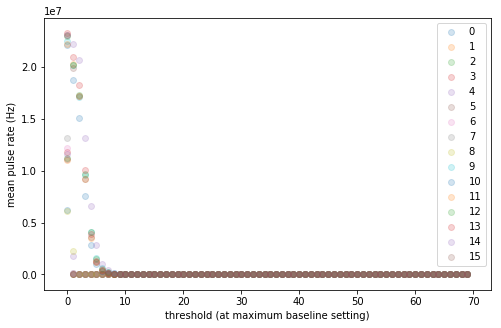

0014 average(16chan) noise thresh: mean =  0.676  +-  0.717   |  RMS  =  0.685  +-  0.632


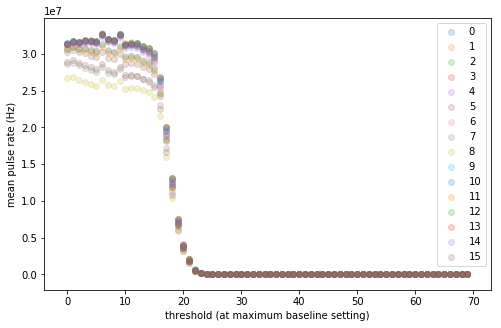

0005 average(16chan) noise thresh: mean =  8.661  +-  0.049   |  RMS  =  5.431  +-  0.018


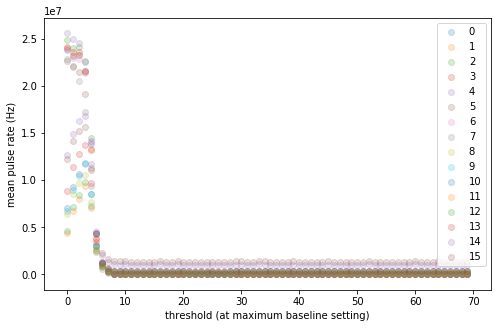

0105 average(16chan) noise thresh: mean =  7.697  +-  6.429   |  RMS  =  10.173  +-  8.791


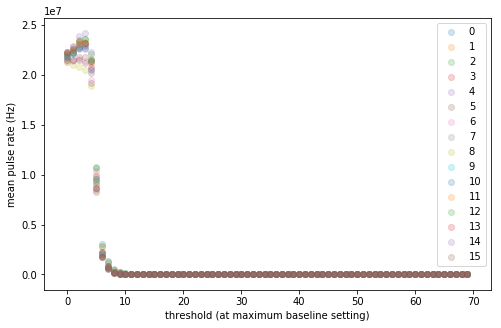

0022 average(16chan) noise thresh: mean =  2.342  +-  0.053   |  RMS  =  1.71  +-  0.048


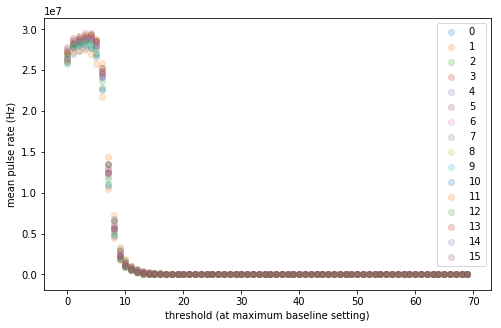

0025 average(16chan) noise thresh: mean =  3.502  +-  0.099   |  RMS  =  2.475  +-  0.104


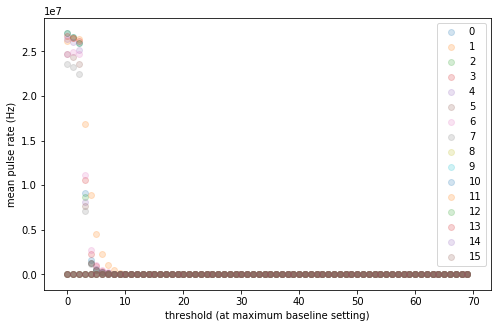

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


0003 average(16chan) noise thresh: mean =  nan  +-  nan   |  RMS  =  nan  +-  nan


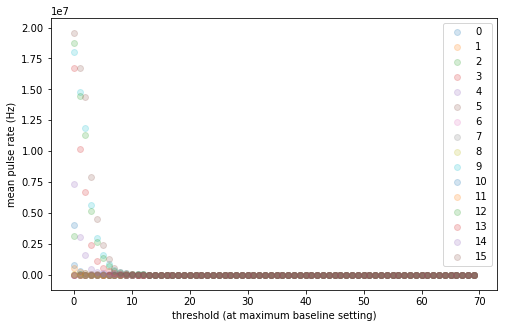

0026 average(16chan) noise thresh: mean =  nan  +-  nan   |  RMS  =  nan  +-  nan


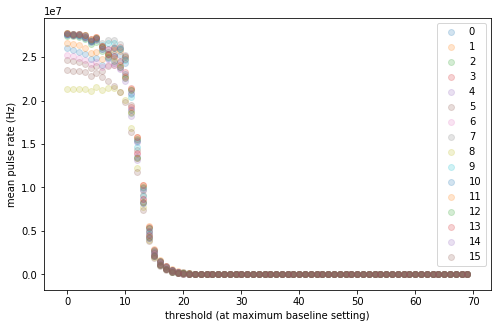

0027 average(16chan) noise thresh: mean =  6.088  +-  0.132   |  RMS  =  4.048  +-  0.065


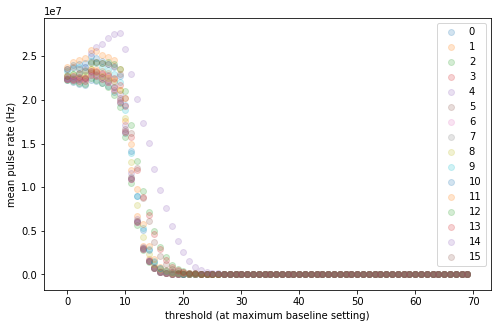

0008 average(16chan) noise thresh: mean =  5.866  +-  0.633   |  RMS  =  3.882  +-  0.408


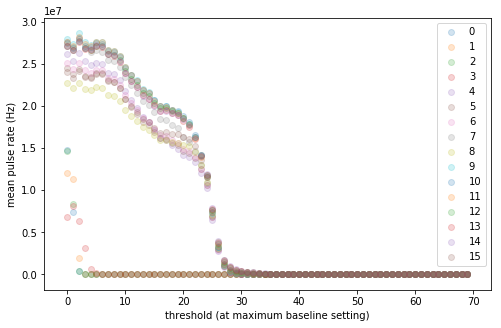

0004 average(16chan) noise thresh: mean =  8.36  +-  4.447   |  RMS  =  5.638  +-  2.858


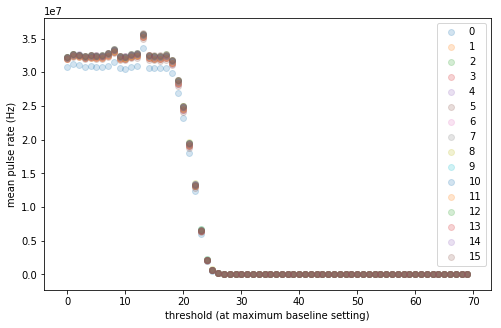

0002 average(16chan) noise thresh: mean =  10.542  +-  0.018   |  RMS  =  6.44  +-  0.007


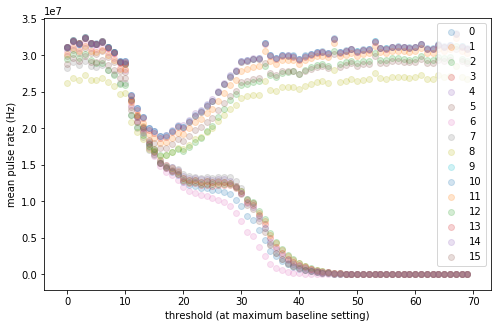

0103 average(16chan) noise thresh: mean =  24.558  +-  11.38   |  RMS  =  15.333  +-  5.273


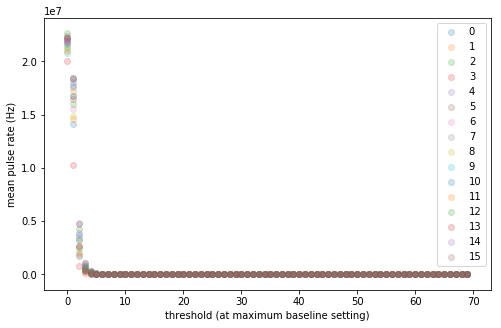

0029 average(16chan) noise thresh: mean =  0.592  +-  0.08   |  RMS  =  0.731  +-  0.07


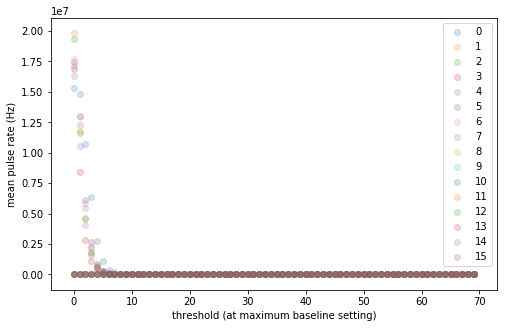

0030 average(16chan) noise thresh: mean =  nan  +-  nan   |  RMS  =  nan  +-  nan


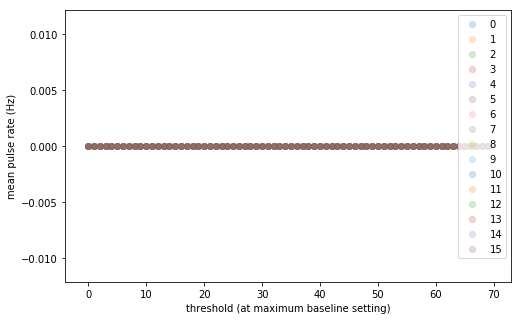

0104 average(16chan) noise thresh: mean =  nan  +-  nan   |  RMS  =  nan  +-  nan


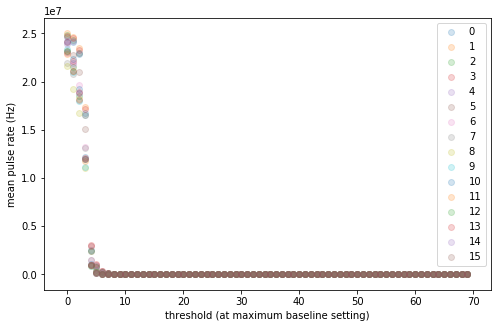

0023 average(16chan) noise thresh: mean =  1.386  +-  0.096   |  RMS  =  1.181  +-  0.065


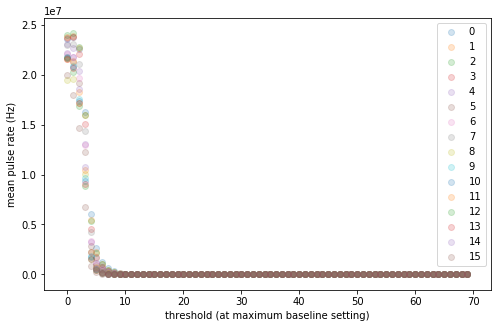

0020 average(16chan) noise thresh: mean =  1.473  +-  0.163   |  RMS  =  1.311  +-  0.136


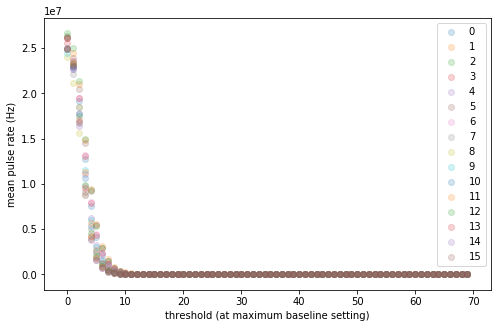

0017 average(16chan) noise thresh: mean =  1.71  +-  0.225   |  RMS  =  1.671  +-  0.178


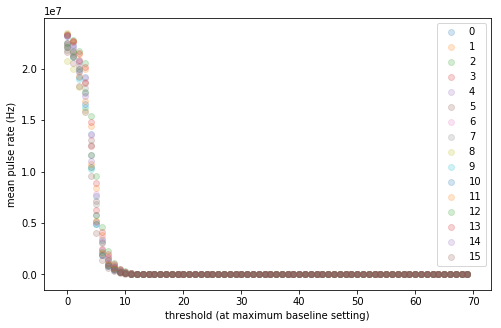

0016 average(16chan) noise thresh: mean =  2.19  +-  0.145   |  RMS  =  1.858  +-  0.097


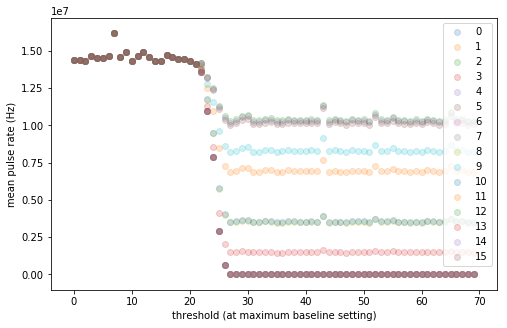

0102 average(16chan) noise thresh: mean =  19.337  +-  8.394   |  RMS  =  13.244  +-  6.266


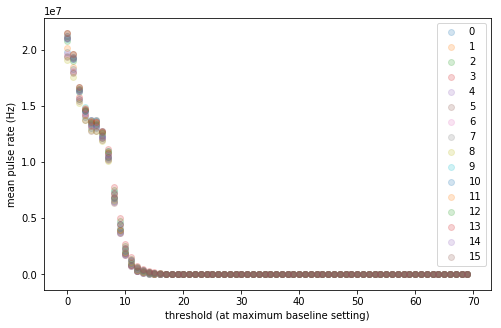

0101 average(16chan) noise thresh: mean =  3.722  +-  0.081   |  RMS  =  2.932  +-  0.095


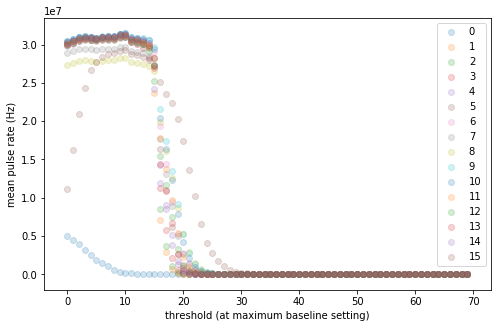

0010 average(16chan) noise thresh: mean =  8.059  +-  1.563   |  RMS  =  5.038  +-  0.741


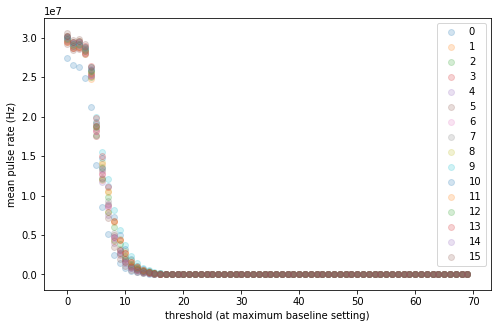

0011 average(16chan) noise thresh: mean =  3.251  +-  0.209   |  RMS  =  2.649  +-  0.17


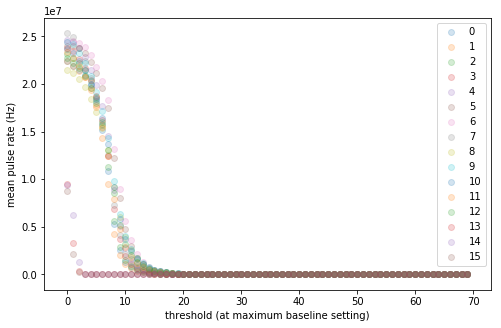

0009 average(16chan) noise thresh: mean =  3.23  +-  1.408   |  RMS  =  2.562  +-  0.994


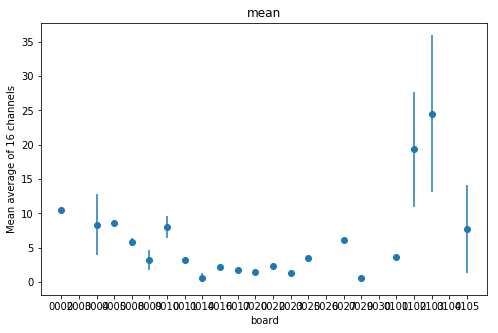

No handles with labels found to put in legend.


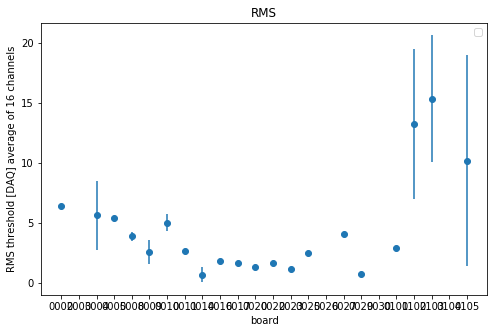

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

In [4]:
## scan threshold of all boar
from functools import (reduce)
from math import (sqrt)
import numpy as np
import time
import tdc_daq as td

# rootMeanSquare :: [Num] -> Float
def rootMeanSquare(xs):
    return sqrt(reduce(lambda a, x: a + x * x, xs, 0) / len(xs))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)
import matplotlib.pyplot as plt

#used_boards = [ "0005", "0017", "0014", "0025" ]
used_boards =  ['0010','0027','0022', '0101','0102','0103','0104','0105']



plt.rcParams["figure.figsize"] = (8,5)
trendtime_list = []
rmsAverageTrend_list = []
rmsAverageTrendError_list = []
meanAverageTrend_list = []
meanAverageTrendError_list = []

#for name in used_boards:
for name in db.board_list(): 
    board_info = db.find_board_by_name(name)
    if  board_info["tdc_addr"] == "0xeeef":
    #if name == "0013" or name == "0018" or name == "0015" or name == "0006" or name == "0021" or name == "0028":
      continue
    ib = 0
    for my_board in db.board_list():
        db.set_standby_board(my_board)
#       ib += 1
#       if  ib > 0.5*len(db.board_list()):
#             break
    db.unset_standby_board(name)
    td.enable_tdc_channels_of_active_boards()
    ptc.init_active_boards()
    td.scaler_rate_of_board(name,0.2)
    #time.sleep(60)
    trendtime_list += [ name ]
    baselines_set =  [-15] * 16 
    #baseline_calib.set_baselines_individual(name,baselines_set)
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
    calib       = db.get_calib_json_by_name(name)
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    board_info  = db.find_board_by_name(name)

    #print(json.dumps(dummy_calib,indent=2, sort_keys=True))
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

    

    for i in range(0,16):
     plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

    plt.legend()
    plt.xlabel("threshold (at maximum baseline setting)")
    plt.ylabel("mean pulse rate (Hz)")
    #plt.yscale('log') 
    plt.show()

    fwhm_list = []
    max_list  = []
    rms_list = []
    mean_list = []
    for i in range(0,16):
      fwhm_list += [ fwhm(tsbl_range,tsbl_scan_raw[i]) ]
      rms_list += [ hist_rms(tsbl_range,tsbl_scan_raw[i]) ]
      mean_list += [ MeanArrays(tsbl_range,tsbl_scan_raw[i]) ]  
      max_list  += [ np.max(tsbl_scan_raw[i])  ]


    fwhm_list = np.array(fwhm_list)
    max_list  = np.array(max_list)
    
    print(name, "average(16chan) noise thresh: mean = ", round(sum(mean_list)/len(mean_list),3), " +- ", round(list_rms(mean_list),3), "  |  RMS  = ", round(sum(rms_list)/len(rms_list),3), " +- ", round(list_rms(rms_list),3) )

    meanAverageTrend_list += [ sum(mean_list)/len(mean_list) ]
    meanAverageTrendError_list += [ list_rms(mean_list) ]
    rmsAverageTrend_list += [ sum(rms_list)/len(rms_list) ]
    rmsAverageTrendError_list += [ list_rms(rms_list) ]    
    
    #plt.scatter(list(range(0,16)), mean_list)
    #plt.xlabel("channel no")
    #plt.ylabel("mean")
    #plt.show()
    #plt.scatter(list(range(0,16)), rms_list)
   # plt.xlabel("channel no")
    #plt.ylabel("RMS")
   # plt.title("noise width (RMS)")
  #  plt.show()

plt.errorbar(trendtime_list, meanAverageTrend_list, yerr=meanAverageTrendError_list, fmt='o')
#plt.scatter(trendtime_list, meanAverageTrend_list)
plt.xlabel("board")
plt.ylabel("Mean average of 16 channels")
plt.title("mean")
plt.show()
    
plt.errorbar(trendtime_list, rmsAverageTrend_list, yerr=rmsAverageTrendError_list, fmt='o')
plt.xlabel("board")
plt.ylabel("RMS threshold [DAQ] average of 16 channels")
plt.title("RMS")
plt.legend()
plt.show()
    #plt.scatter(list(range(0,16)), max_list)
    #plt.xlabel("channel no")
    #plt.ylabel("scaler rate")
    #plt.title("Max noise rate")
    #plt.show()

In [ ]:
import ROOT


gr  = ROOT.TGraphErrors()
gr2 = ROOT.TGraphErrors()
#len(meanAverageTrend_list),np.array(trendtime_list),np.array(meanAverageTrend_list))
for i in range(0,len(meanAverageTrend_list)):
    gr.SetPoint(i, np.double(trendtime_list[i]), np.double(meanAverageTrend_list[i]))
    gr.SetPointError(i, 0, np.double(meanAverageTrendError_list[i]) )
    gr2.SetPoint(i, np.double(trendtime_list[i]), np.double(rmsAverageTrend_list[i]))
    gr2.SetPointError(i, 0, np.double(rmsAverageTrendError_list[i]) )    
c = ROOT.TCanvas("mean","mean",640,480)
gr.Draw("A*")
c.Draw()
c2 = ROOT.TCanvas("rms","rms",640,480)
gr2.Draw("A*")

c2.Draw()
print("Mean (of all boards) = ", list_mean(meanAverageTrend_list), " +- ", list_rms(meanAverageTrend_list) )
print("RMS (of all boards) = ", list_mean(rmsAverageTrend_list), " +- ", list_rms(rmsAverageTrend_list) )

#db.find_board_by_name("0030")

In [ ]:
#db.find_board_by_tdc_connector("0x1503",2) # TDC as string, Connector as integer

In [ ]:
#print("active board list (boards being programmed)")
#print(db.active_board_list())
#print("")
#print("complete board list (all boards in the database)")
#print(db.board_list())

In [ ]:
#archive(label="my_important_thing")

In [ ]:
#print("Hello World")